In [270]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [271]:
dataset = pd.read_csv('D3.csv')
dataset.head()

,X1,X2,X3,Y
0,0.000000,3.440000,0.440000,4.387545
1,0.040404,0.134949,0.888485,2.679650
2,0.080808,0.829899,1.336970,2.968490
3,0.121212,1.524848,1.785455,3.254065
4,0.161616,2.219798,2.233939,3.536375


In [272]:
x1 = dataset.values[:, 0]
x2 = dataset.values[:, 1]
x3 = dataset.values[:, 2]
y = dataset.values[:, 3]
m = len(y)

print('x = ', x1[: 100])
print('m = ', m)

x =  [0.         0.04040404 0.08080808 0.12121212 0.16161616 0.2020202
 0.24242424 0.28282828 0.32323232 0.36363636 0.4040404  0.44444444
 0.48484848 0.52525252 0.56565657 0.60606061 0.64646465 0.68686869
 0.72727273 0.76767677 0.80808081 0.84848485 0.88888889 0.92929293
 0.96969697 1.01010101 1.05050505 1.09090909 1.13131313 1.17171717
 1.21212121 1.25252525 1.29292929 1.33333333 1.37373737 1.41414141
 1.45454546 1.49494949 1.53535354 1.57575758 1.61616162 1.65656566
 1.6969697  1.73737374 1.77777778 1.81818182 1.85858586 1.8989899
 1.93939394 1.97979798 2.02020202 2.06060606 2.1010101  2.14141414
 2.18181818 2.22222222 2.26262626 2.3030303  2.34343434 2.38383838
 2.42424242 2.46464646 2.5050505  2.54545455 2.58585859 2.62626263
 2.66666667 2.70707071 2.74747475 2.78787879 2.82828283 2.86868687
 2.90909091 2.94949495 2.98989899 3.03030303 3.07070707 3.11111111
 3.15151515 3.19191919 3.23232323 3.27272727 3.31313131 3.35353535
 3.39393939 3.43434343 3.47474748 3.51515151 3.55555556 3.5

Text(0.5, 1.0, 'Scatter plot of HW1')

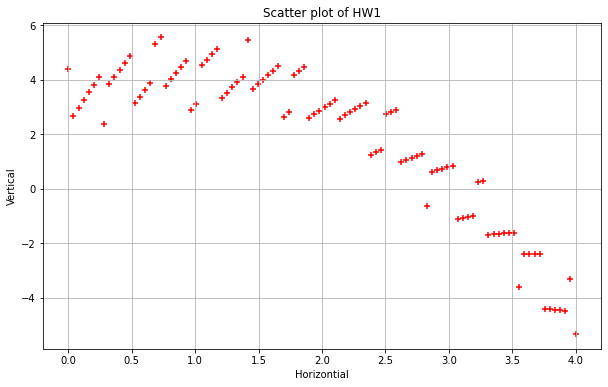

In [273]:
plt.scatter(x1,y, color='red' , marker= '+')
plt.grid()
plt.rcParams["figure.figsize"] = (10,6)
plt.xlabel('Horizontial')
plt.ylabel('Vertical')
plt.title('Scatter plot of HW1')

In [274]:
x_0 = np.ones((m, 1))
x_0[:5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [275]:
x_1 = x1.reshape(m, 1)
x_1[:5]


array([[0.        ],
       [0.04040404],
       [0.08080808],
       [0.12121212],
       [0.16161616]])

In [276]:
x_2 = x2.reshape(m, 1)
x_2[:5]


array([[3.44      ],
       [0.1349495 ],
       [0.82989899],
       [1.52484848],
       [2.21979798]])

In [277]:
x_3 = x3.reshape(m, 1)
x_3[:5]


array([[0.44      ],
       [0.88848485],
       [1.3369697 ],
       [1.78545454],
       [2.23393939]])

In [278]:
X1 = np.hstack((x_0, x_1))
X1[:5]

array([[1.        , 0.        ],
       [1.        , 0.04040404],
       [1.        , 0.08080808],
       [1.        , 0.12121212],
       [1.        , 0.16161616]])

In [279]:
X2 = np.hstack((x_0, x_2))
X2[:5]

array([[1.        , 3.44      ],
       [1.        , 0.1349495 ],
       [1.        , 0.82989899],
       [1.        , 1.52484848],
       [1.        , 2.21979798]])

In [280]:
X3 = np.hstack((x_0, x_3))
X3[:5]

array([[1.        , 0.44      ],
       [1.        , 0.88848485],
       [1.        , 1.3369697 ],
       [1.        , 1.78545454],
       [1.        , 2.23393939]])

In [281]:
theta = np.zeros(2)
theta

array([0., 0.])

In [321]:
def get_loss_1(X1, y, theta):
    """
    x is inpute data (m x n)
    y (m x 1)
    theta (n x 1)
    """
    h1 = X1.dot(theta)
    error = np.subtract(h1, y)
    sqrError = np.square(error)
    J1 = 1 / (2 * m) * np.sum(sqrError)

    return J1


In [322]:
loss_x1 = get_loss_1(X1, y, theta)

print(loss_x1)

0.9849930825405946


In [323]:
def gradient_descent_x1(X1, y, theta, alpha, iterations):
    
    cost_history_1 = np.zeros(iterations)
    
    for i in range(iterations):
        h1 = X1.dot(theta)
        error = np.subtract(h1, y)
        sum_delta = (alpha / m) * X1.transpose().dot(error);
        theta = theta - sum_delta;
        cost_history_1[i] = get_loss_1(X1, y, theta)
        
    return theta, cost_history_1

In [324]:
theta = [0., 0.]
iterations = 1500;
alpha = 0.1;

In [325]:
theta, cost_history_1 = gradient_descent_x1(X1, y, theta, alpha, iterations)
print('Value of Theta: ', theta)
print('Cost History: ', cost_history_1)

Value of Theta:  [ 5.92794892 -2.03833663]
Cost History:  [5.16999006 4.96338989 4.7855721  ... 0.98499308 0.98499308 0.98499308]


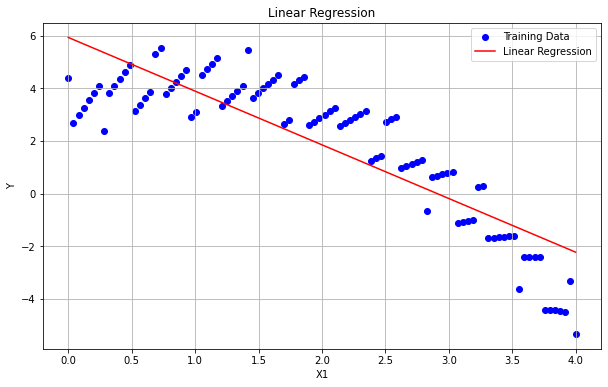

In [326]:
plt.scatter(X1[:,1], y, color = 'blue', label = 'Training Data')
plt.plot(X1[:,1], X1.dot(theta), color = 'red', label = 'Linear Regression')


plt.rcParams["figure.figsize"] = (10, 6)
plt.grid()
plt.xlabel('X1')
plt.ylabel('Y')
plt.title('Linear Regression')

plt.legend()

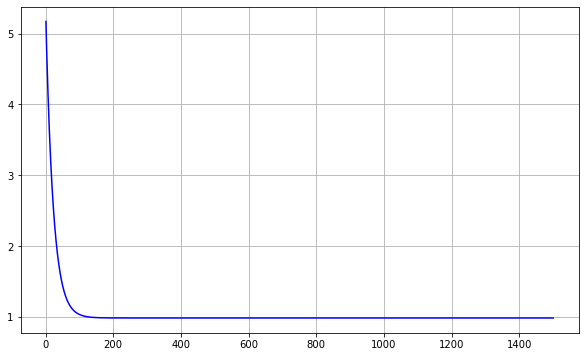

In [327]:
plt.plot(range(1, iterations + 1), cost_history_1, color = 'blue')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid()


In [328]:
def get_loss_2(X2, y, theta):
    """
    x is inpute data (m x n)
    y (m x 1)
    theta (n x 1)
    """
    h2 = X2.dot(theta)
    error = np.subtract(h2, y)
    sqrError = np.square(error)
    J2 = 1 / (2 * m) * np.sum(sqrError)

    return J2


In [329]:
loss_x2 = get_loss_2(X2, y, theta)

print(loss_x2)

8.182525826043467


In [330]:
def gradient_descent_x2(X2, y, theta, alpha, iterations):
    
    cost_history_2 = np.zeros(iterations)
    
    for i in range(iterations):
        h2 = X2.dot(theta)
        error = np.subtract(h2, y)
        sum_delta = (alpha / m) * X2.transpose().dot(error);
        theta = theta - sum_delta;
        cost_history_2[i] = get_loss_2(X2, y, theta)
        
    return theta, cost_history_2

In [331]:
theta = [0., 0.]
iterations = 1500;
alpha = 0.01;

In [332]:
theta, cost_history_2 = gradient_descent_x2(X2, y, theta, alpha, iterations)
print('Value of Theta: ', theta)
print('Cost History: ', cost_history_2)

Value of Theta:  [0.71988473 0.56390334]
Cost History:  [5.29831663 5.09909109 4.92356115 ... 3.5993997  3.59939955 3.5993994 ]


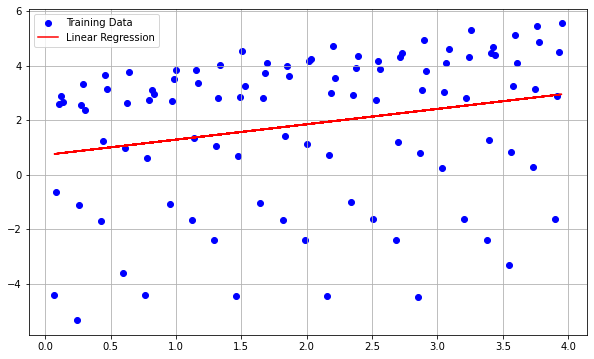

In [333]:
plt.scatter(X2[:,1], y, color = 'blue', label = 'Training Data')
plt.plot(X2[:,1], X2.dot(theta), color = 'red', label = 'Linear Regression')


plt.rcParams["figure.figsize"] = (10, 6)
plt.grid()


plt.legend()

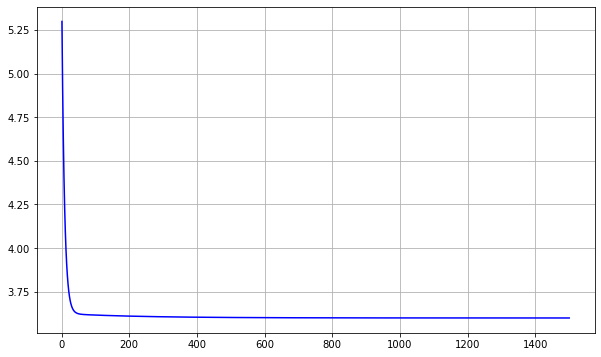

In [334]:
plt.plot(range(1, iterations + 1), cost_history_2, color = 'blue')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid()

In [335]:
def get_loss_3(X3, y, theta):
    """
    x is inpute data (m x n)
    y (m x 1)
    theta (n x 1)
    """
    h3 = X3.dot(theta)
    error = np.subtract(h3, y)
    sqrError = np.square(error)
    J3 = 1 / (2 * m) * np.sum(sqrError)

    return J3


In [336]:
loss_x3 = get_loss_3(X3, y, theta)

print(loss_x3)

4.417085543820646


In [337]:
def gradient_descent_x3(X3, y, theta, alpha, iterations):
    
    cost_history_3 = np.zeros(iterations)
    
    for i in range(iterations):
        h3 = X3.dot(theta)
        error = np.subtract(h3, y)
        sum_delta = (alpha / m) * X3.transpose().dot(error);
        theta = theta - sum_delta;
        cost_history_3[i] = get_loss_3(X3, y, theta)
        
    return theta, cost_history_3

In [338]:
theta = [0., 0.]
iterations = 1500;
alpha = 0.01;

In [339]:
theta, cost_history_3 = gradient_descent_x3(X3, y, theta, alpha, iterations)
print('Value of Theta: ', theta)
print('Cost History: ', cost_history_3)

Value of Theta:  [ 2.78048129 -0.48451631]
Cost History:  [5.40768785 5.30397076 5.21178297 ... 3.63053597 3.6305311  3.63052625]


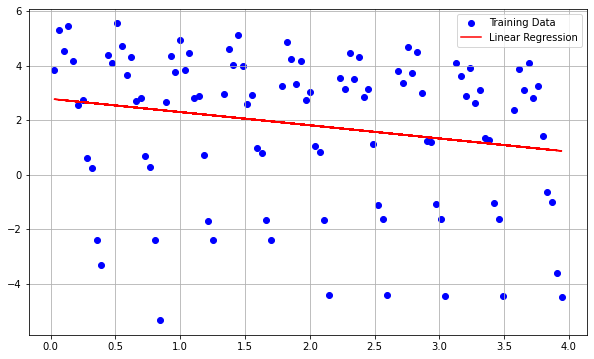

In [340]:
plt.scatter(X3[:,1], y, color = 'blue', label = 'Training Data')
plt.plot(X3[:,1], X3.dot(theta), color = 'red', label = 'Linear Regression')


plt.rcParams["figure.figsize"] = (10, 6)
plt.grid()


plt.legend()

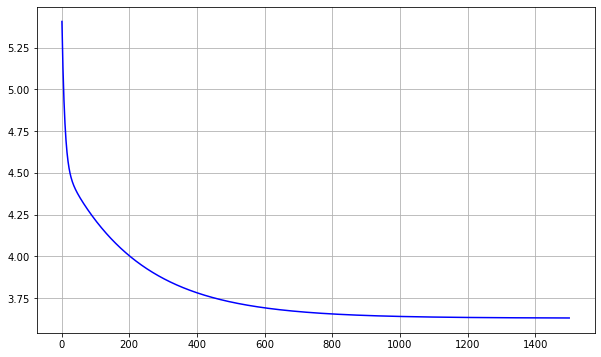

In [341]:
plt.plot(range(1, iterations + 1), cost_history_3, color = 'blue')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid()